# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 3 - Brownian motion, Fourier transform

---


## Guidelines (read carefully before starting)


**Objectives**: acquire further practice with common libraries and algorithms (`numpy.fft`, `matplotlib`, `seaborn`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the `.zip` archive in a local folder (Computer -> Documents/Python/);
- unzip the archive `.zip`;
- rename the folder with the convention `lab3_Name1_Name2`;
- duplicate the notebook file and rename it `lab3_Name1_Name2.ipynb`;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab3` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab3 --file=requirement.txt --channel conda-forge
    conda activate lab3
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab3
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab3`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy.random`: [documentation](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) 

[2] `numpy.fft`: [documentation](https://numpy.org/doc/stable/reference/routines.fft.html?highlight=fft#module-numpy.fft)

[3] `seaborn`: [tutorial/documentation](https://seaborn.pydata.org/tutorial.html#)

[4] `pandas`: [documentation](https://pandas.pydata.org/docs/reference/index.html)

[5] `matplotlib`: [documentation](https://matplotlib.org/contents.html)


## <a name="content">Contents</a>
- [Exercise 1: Titanic data handling](#ex1)
- [Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution](#ex2)
---

In [20]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Titanic data handling</a> [(&#8593;)](#content)

Welcome to this data cleaning exercise with the Titanic dataset. Data cleaning is a crucial step in data analysis, involving tasks like handling missing values, adjusting data types, and preparing data for analysis.

In this exercise, we'll use Python and Pandas to clean the Titanic dataset, which contains passenger information. The goal is to get the data ready for analysis by addressing data quality issues.

You'll go through tasks like identifying and handling missing values, selecting relevant columns, converting data types, handling categorical data, and performing basic data exploration using Matplotlib and seaborn.

Let's begin by importing the dataset and taking a first look at the data.

### 1. Data import

Download the Titanic dataset from [this link](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) file into a Pandas DataFrame.
Name the DataFrame descriptively.

Your answers(s)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic=pd.read_csv('titanic_passengers.csv')

Initial Data Overview:

- Display the first five rows of the DataFrame using `head()`.
- Check for missing values in each column, display the number of missing values in each column as a percentage.
- Inspect data types using dtypes, and convert data types where needed.
- Identify categorical columns, and encode them using pd.get_dummies().

Your answers(s)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# divide number of missing values in each column by total number of rows.

missing_values=pd.DataFrame(((titanic.isna().sum()/titanic.shape[0])*100).round(2)).reset_index().rename(columns={0:'missing_values_%','index':'column_name'})
missing_values

,column_name,missing_values_%
0,PassengerId,0.00
1,Survived,0.00
2,Pclass,0.00
3,Name,0.00
4,Sex,0.00
5,Age,19.87
6,SibSp,0.00
7,Parch,0.00
8,Ticket,0.00
9,Fare,0.00


In [24]:
# check data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
# change data types for categorical variables

titanic['Pclass']=titanic['Pclass'].astype('str')
titanic['Survived']=titanic['Survived'].astype('str')

In [26]:
# transform categorical variables into dummies and add them to titanic df

dummies=pd.get_dummies(titanic[['Sex', 'Embarked']], prefix=['Sex', 'Embarked'],dtype=int)

titanic=pd.concat([titanic,dummies],axis=1)

Handling Missing Values:
Develop a strategy to address missing values, considering alternatives like imputation or removal.
- Hint: Look into the `dropna()` and `fillna()` methods depending on your strategy.

Your answers(s)

In [27]:
missing_values

,column_name,missing_values_%
0,PassengerId,0.00
1,Survived,0.00
2,Pclass,0.00
3,Name,0.00
4,Sex,0.00
5,Age,19.87
6,SibSp,0.00
7,Parch,0.00
8,Ticket,0.00
9,Fare,0.00


In [28]:
# as the percentage of missing values in the "Cabin" column is too high we will just delete the column
titanic.drop(columns=['Cabin'],inplace=True)

In [29]:
# for the "Embarked" column we have just 2 rows with missing values, which represents 0.2% of the data, so we will delete them

titanic.dropna(subset=['Embarked'], inplace=True)

In [30]:
# for age missing values, we will assign the average age witih survived/not survived groups
average_age_survived=np.trunc(np.mean(titanic[titanic['Survived']=='1']['Age']))
average_age_not_survived=np.trunc(np.mean(titanic[titanic['Survived']=='0']['Age']))

titanic.loc[((titanic["Age"].isna())&(titanic["Survived"]=='1')), "Age"] = average_age_survived
titanic.loc[((titanic["Age"].isna())&(titanic["Survived"]=='0')), "Age"] = average_age_not_survived

In [31]:
# now, we have 0 missing values
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Insights:

Look into how certain variables influence other vairables in the dataset and try to find some interesting insights.
- Hint: You can inverstigate `groupby()` and `agg()` to aggregate data, as well as `value_counts` or `pivot`..


Your answers(s)

In [32]:
titanic.groupby(by=['Survived', 'Pclass'])[['PassengerId']].count()

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               134
         2                87
         3               119

In [ ]:
'''
From the distribution of passengers classes, we can see that the majority of passenger who survived were the ones
with highest classes (1,2), and the bast majority of passengers who did not belonged to the lowest class (3)

'''

In [33]:
titanic.groupby(by=['Survived', 'Sex'])[['PassengerId']].count()

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          231
         male            109

In [ ]:
'''
We can see a great insight from here. It seems they prioritized to save women over men.
Since, the proportion of women who survived is quite higher compared to the proportion of men.

'''

In [34]:
titanic.groupby(by=['Survived', 'Embarked'])[['PassengerId']].count()

PassengerId
Survived Embarked             
0        C                  75
         Q                  47
         S                 427
1        C                  93
         Q                  30
         S                 217

In [35]:
titanic.groupby(by=['Survived'])[['Age']].mean()

,Age
Survived,
0,30.483607
1,28.163735


In [ ]:
'''

The average age between people that survived and that didn't is actually not that different.

'''

In [36]:
titanic.groupby(by=['Survived'])[['Fare']].mean()

,Fare
Survived,
0,22.117887
1,48.209498


In [ ]:
''' 
This totally makes sense, and has a relationship the the class variable we already analyzed. The average fare paid
by the people who survived is more than double from the people who didn't.

This let us conclude, that the priorization for saving people was strongly made by passenger class, and sex.

'''

Visualisation
Choose appropriate plotting techniques for visualizing columns of your choosing display them.
Generate at least 4 graphs, complete with axes, titles, and legends. Feel free to add error bars, confidence intervals, differences in hue, size, and shape if appropriate.
- Hint: Pandas has a built-in plotting library that is a wrapper around matplotlib. You can learn more [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

Your answers(s)

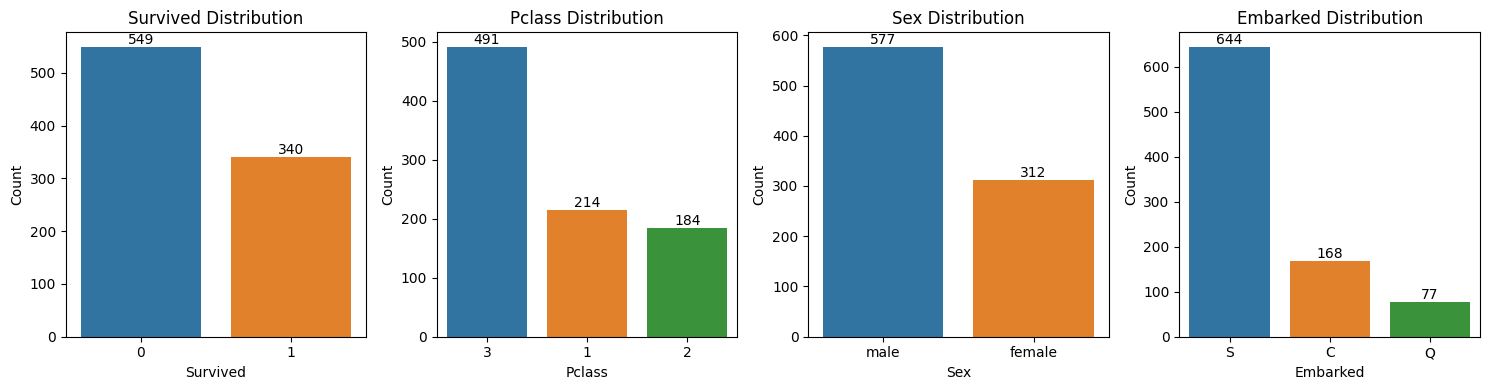

In [37]:
# analyze the distribution of categorical variables in the dataset

categorical_variables = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Create subplots
num_plots = len(categorical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4))

# Iterate through categorical variables and create a chart for each
for i, variable in enumerate(categorical_variables):
    chart = sns.countplot(data=titanic, x=variable, ax=axes[i])

    for label in chart.containers:
        chart.bar_label(label)

    # Set the title
    chart.set_title(f'{variable} Distribution')

    # Set the x and y axis labels
    chart.set_xlabel(variable)
    chart.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


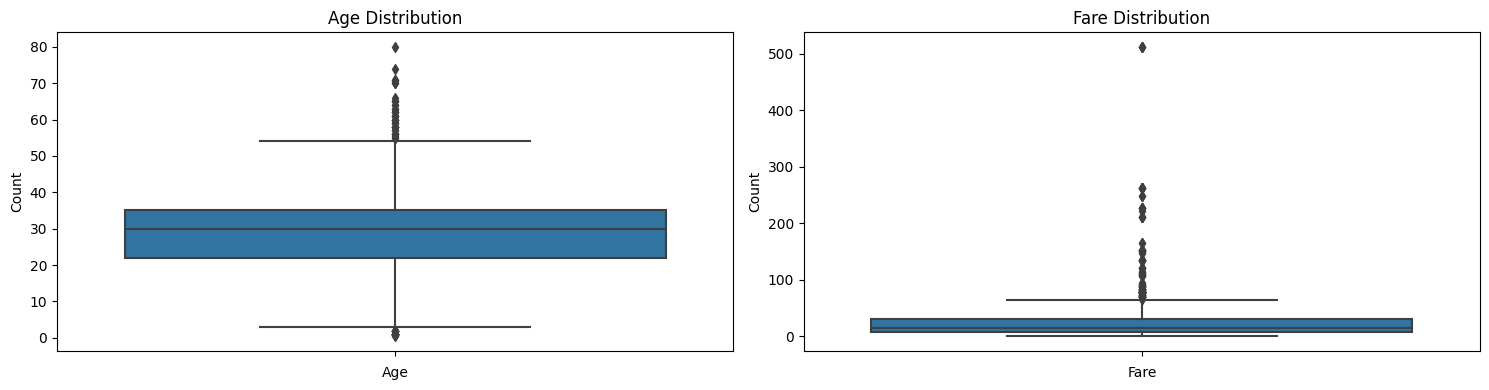

In [38]:
# analyze the distribution of numerical variables in the dataset

categorical_variables = ['Age', 'Fare']

# Create subplots
num_plots = len(categorical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4))

# Iterate through categorical variables and create a chart for each
for i, variable in enumerate(categorical_variables):
    chart = sns.boxplot( y=variable, data=titanic,ax=axes[i])   

    for label in chart.containers:
        chart.bar_label(label)

    # Set the title
    chart.set_title(f'{variable} Distribution')

    # Set the x and y axis labels
    chart.set_xlabel(variable)
    chart.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


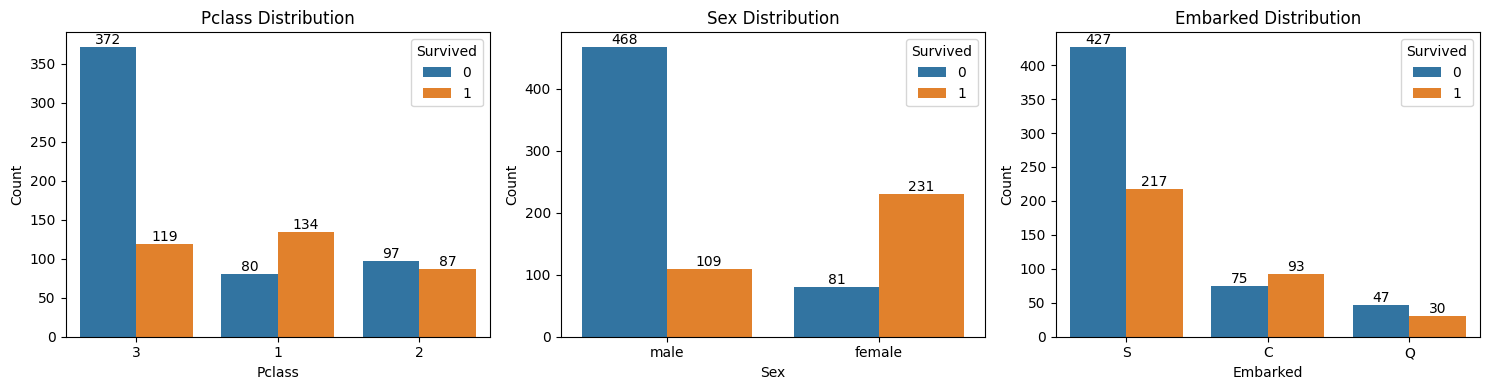

In [39]:
# analyze the distribution of categorical variables in the dataset relative to response variable

categorical_variables = ['Pclass', 'Sex', 'Embarked']

# Create subplots
num_plots = len(categorical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4))

# Iterate through categorical variables and create a chart for each
for i, variable in enumerate(categorical_variables):
    chart = sns.countplot(data=titanic, x=variable, ax=axes[i],hue='Survived')

    for label in chart.containers:
        chart.bar_label(label)

    # Set the title
    chart.set_title(f'{variable} Distribution')

    # Set the x and y axis labels
    chart.set_xlabel(variable)
    chart.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


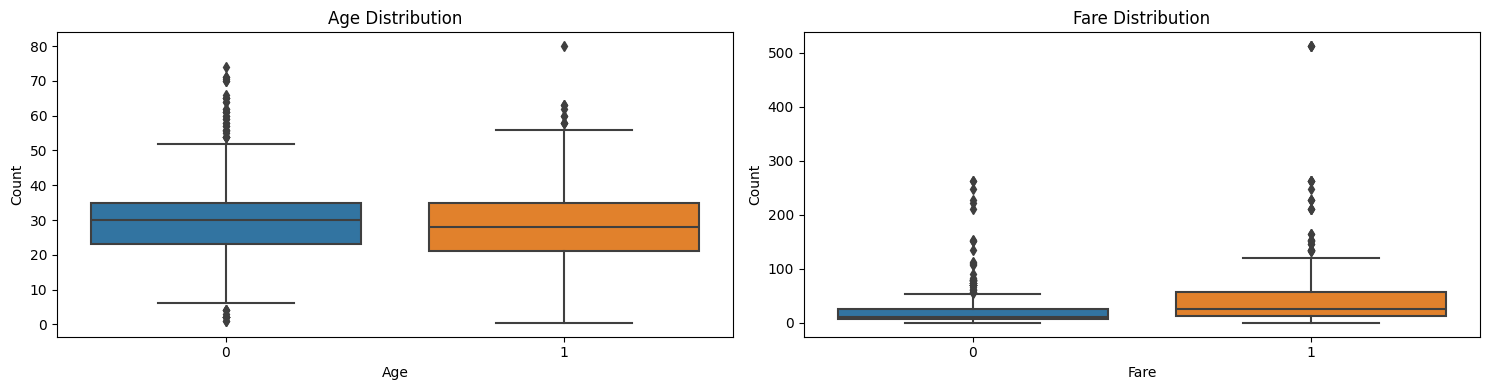

In [40]:
# analyze the distribution of numerical variables in the dataset relative to response variable

categorical_variables = ['Age', 'Fare']

# Create subplots
num_plots = len(categorical_variables)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4))

# Iterate through categorical variables and create a chart for each
for i, variable in enumerate(categorical_variables):
    chart = sns.boxplot(x='Survived', y=variable, data=titanic,ax=axes[i])   

    for label in chart.containers:
        chart.bar_label(label)

    # Set the title
    chart.set_title(f'{variable} Distribution')

    # Set the x and y axis labels
    chart.set_xlabel(variable)
    chart.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Bonus**

Write a simple classifier to predict wether a passenger survives or not. You can use the `sklearn` library to do so.

In [61]:
X=titanic[['Age', 'SibSp','Parch', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S']].to_numpy()
y=titanic[['Survived']].astype(int).to_numpy()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

model = LinearRegression().fit(X_train, y_train)

In [63]:
# the output of the model gives the probability of surviving or not
model.predict(X_test)

array([[ 0.649053  ],
       [ 0.71718425],
       [ 0.25191871],
       [ 0.16883958],
       [ 0.08640074],
       [ 0.20519457],
       [ 0.58522035],
       [ 0.29960431],
       [ 0.15221104],
       [ 0.34197172],
       [ 0.18067194],
       [ 0.73411817],
       [ 0.40558692],
       [ 0.16688573],
       [ 0.10630167],
       [ 0.64219685],
       [ 1.00752986],
       [ 0.67818382],
       [ 0.46058734],
       [ 0.70377618],
       [ 0.84815119],
       [ 0.71345693],
       [ 0.160797  ],
       [ 0.85580129],
       [ 0.67368614],
       [ 0.72433752],
       [ 0.83383856],
       [ 0.19867594],
       [ 0.68269175],
       [ 0.66058883],
       [ 0.18803726],
       [ 0.16792173],
       [ 0.25352449],
       [ 0.59506529],
       [ 0.77671751],
       [ 0.26104849],
       [ 0.14073707],
       [ 0.81280963],
       [ 0.67213445],
       [ 0.54740284],
       [ 0.17075917],
       [ 0.17643316],
       [ 0.20601853],
       [ 0.78871987],
       [ 0.16620637],
       [ 0

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a> [(&#8593;)](#content)

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

Your answers(s)

In [2]:
from PIL import Image
import numpy as np

# Open an image file
img = Image.open('img\\cameraman.png')

# Convert the image to a numpy array
img_array = np.array(img)

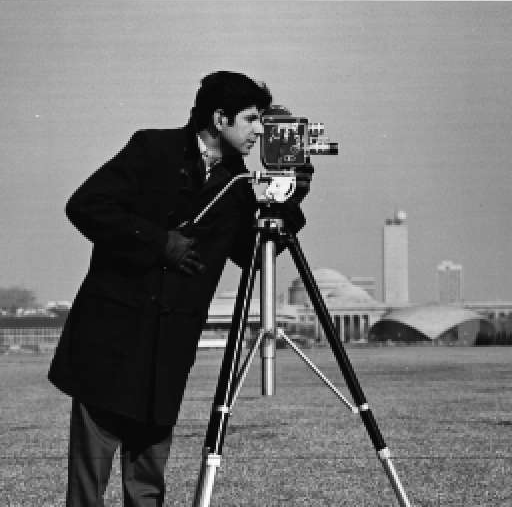

In [3]:
img.convert('RGB')

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

Your answers(s)

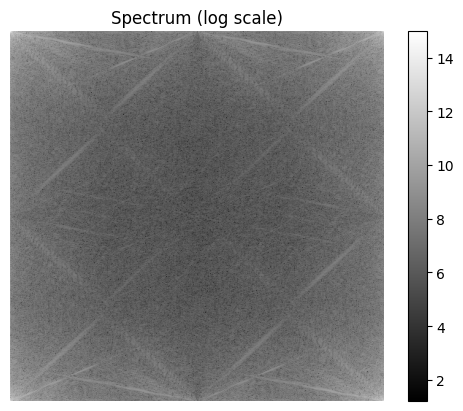

Null frequency location: (253, 256)


In [18]:
# Compute the 2D Fourier transform of the image
X = np.fft.fft2(img_array)

# Compute the squared absolute value of the Fourier transform
spectrum = np.abs(X) ** 2

# Display the spectrum in logarithmic scale
plt.imshow(np.log10(spectrum), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('Spectrum (log scale)')
plt.show()

# Get the shape of the spectrum
M, N = spectrum.shape

# Compute the indices for the null frequency
null_freq_location = (M // 2, N // 2)

'''

After using np.fft.fftshift method, the pixel associated with the null frequency is located at the center of the image.

'''

print("Null frequency location: ({}, {})".format(null_freq_location[0], null_freq_location[1]))

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

Your answers(s)

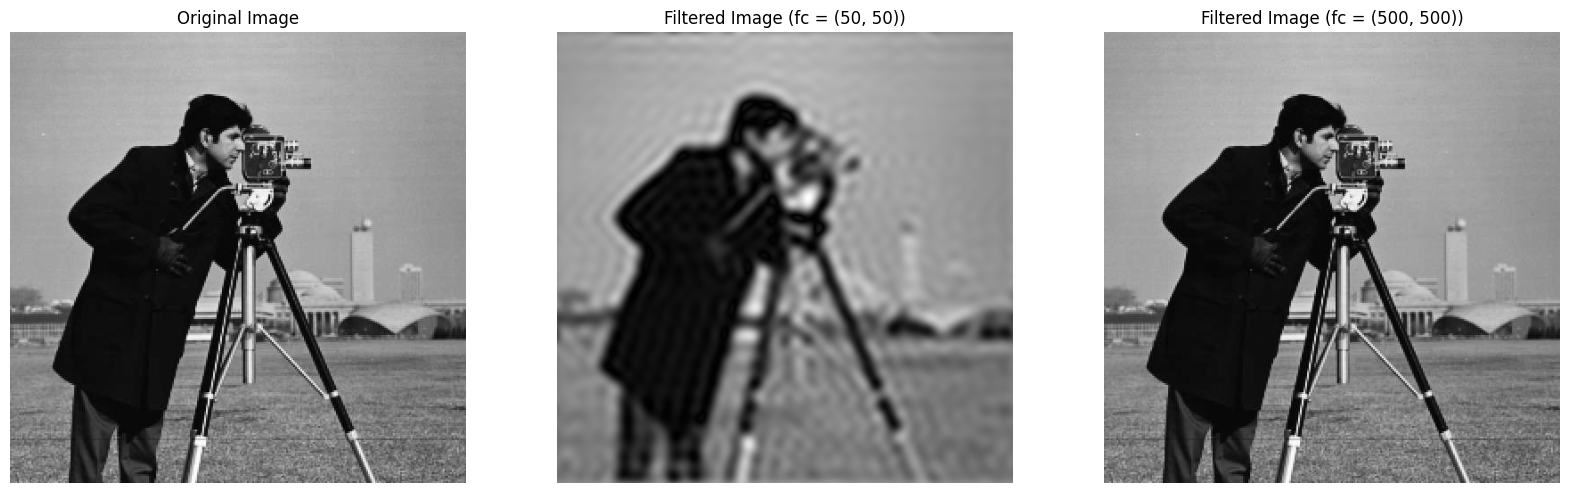

In [16]:
def ideal_lowpass_filter(image, fc):
    # Compute the 2D Fourier transform of the image
    X = np.fft.fft2(image)
    
    # Shift the zero frequency component to the center
    X_shifted = np.fft.fftshift(X)
    
    # Get the shape of the image
    M, N = image.shape
    
    # Compute the indices for the cutoff frequencies
    fc_y, fc_x = fc
    cy, cx = M // 2, N // 2
    y_start, y_end = cy - fc_y // 2, cy + fc_y // 2
    x_start, x_end = cx - fc_x // 2, cx + fc_x // 2
    
    # Apply the ideal low-pass filter
    X_shifted_filtered = np.zeros_like(X_shifted)
    X_shifted_filtered[y_start:y_end, x_start:x_end] = X_shifted[y_start:y_end, x_start:x_end]
    
    # Shift the zero frequency component back to the corner
    X_filtered = np.fft.ifftshift(X_shifted_filtered)
    
    # Compute the inverse Fourier transform to obtain the filtered image
    filtered_image = np.fft.ifft2(X_filtered)
    
    # Take the absolute value to get the magnitude
    filtered_image = np.abs(filtered_image)
    
    # Return the filtered image
    return filtered_image

# Set smaller font size for titles
plt.rcParams.update({'font.size': 10})

# Set the figure size
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title('Original Image')

# Apply the ideal low-pass filter with different cutoff frequencies
fc1 = (50, 50)
filtered_image1 = ideal_lowpass_filter(img_array, fc1)

fc2 = (500, 500)
filtered_image2 = ideal_lowpass_filter(img_array, fc2)

# Display the filtered images
plt.subplot(1, 3, 2)
plt.imshow(filtered_image1, cmap='gray')
plt.axis('off')
plt.title('Filtered Image (fc = {})'.format(fc1))

plt.subplot(1, 3, 3)
plt.imshow(filtered_image2, cmap='gray')
plt.axis('off')
plt.title('Filtered Image (fc = {})'.format(fc2))

plt.show()

In [ ]:
'''

We can see that as the frequency increases, the quality of the image increases as well.

For low frequencies, the image gets blurred.

'''

**Bonus**


4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \bigg( \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \bigg) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform and $P_1^*$ is a cropping operator (adjoint of $P_1$). 

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

Your answers(s)

In [ ]:
# your code